In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1105,2020-07-24,United Kingdom,297206.0,297146.0,45651.0,45554.0,60.0,97.0
1106,2020-07-24,Germany,203875.0,204183.0,9114.0,9111.0,-308.0,3.0
1107,2020-07-24,Iran,284828.0,284034.0,15047.0,15074.0,794.0,-27.0
1108,2020-07-24,Turkey,223294.0,223315.0,5562.0,5563.0,-21.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3334.5216216216218
RMSE =  9136.096807432306


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.24594594594595
RMSE =  689.8868538906733


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  17932.48598130841
RMSE =  25782.67042860197
-- World performances for deaths --
MAE =  1563.6728971962616
RMSE =  1901.547768500137


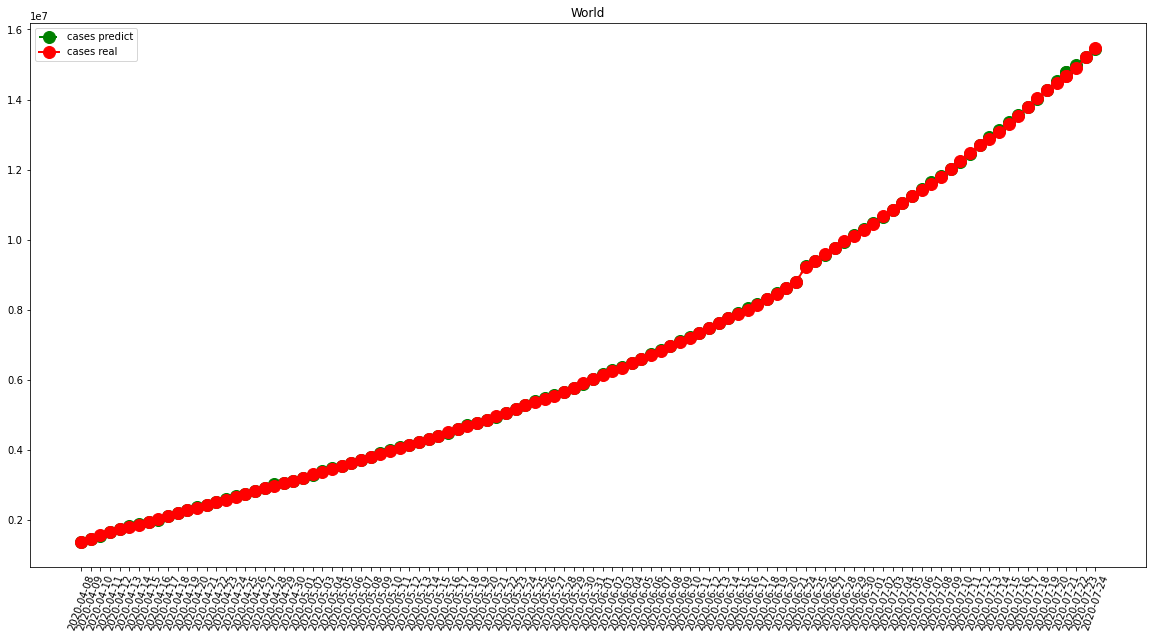

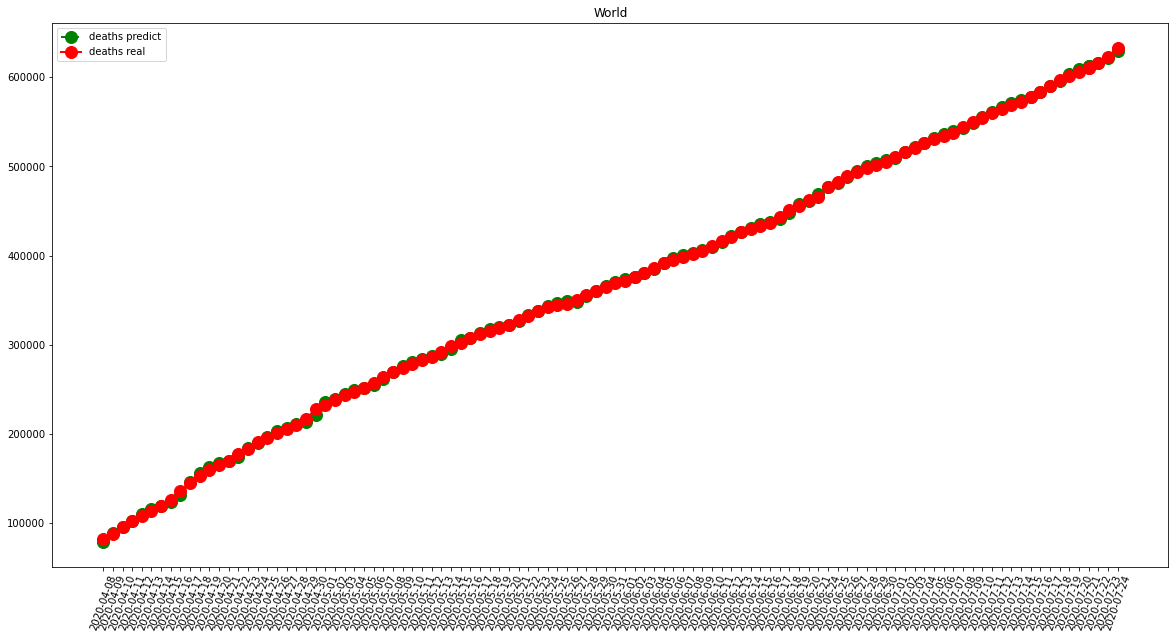

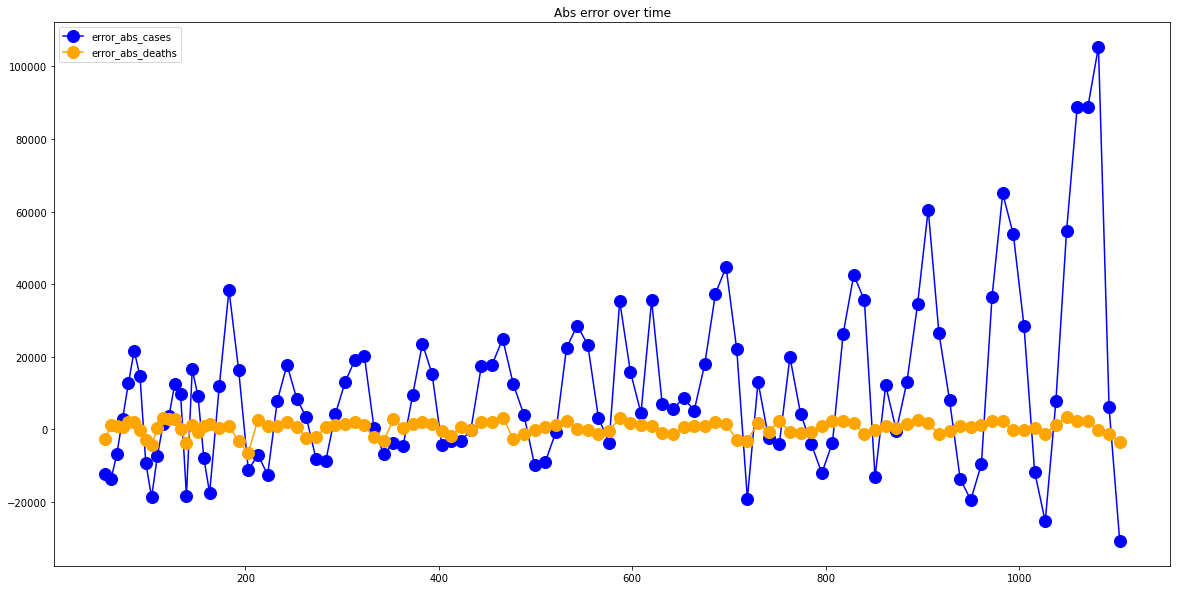

In [7]:
visShow("World")

-- France performances for cases --
MAE =  847.6239316239316
RMSE =  1378.657138041763
-- France performances for deaths --
MAE =  153.69230769230768
RMSE =  309.82881956960915


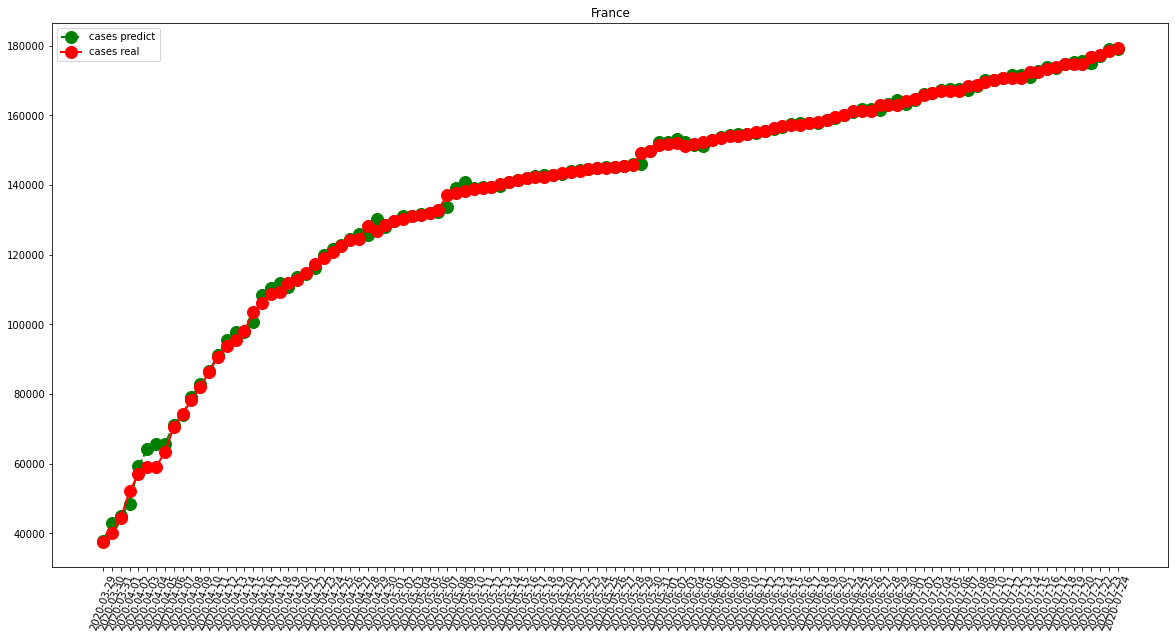

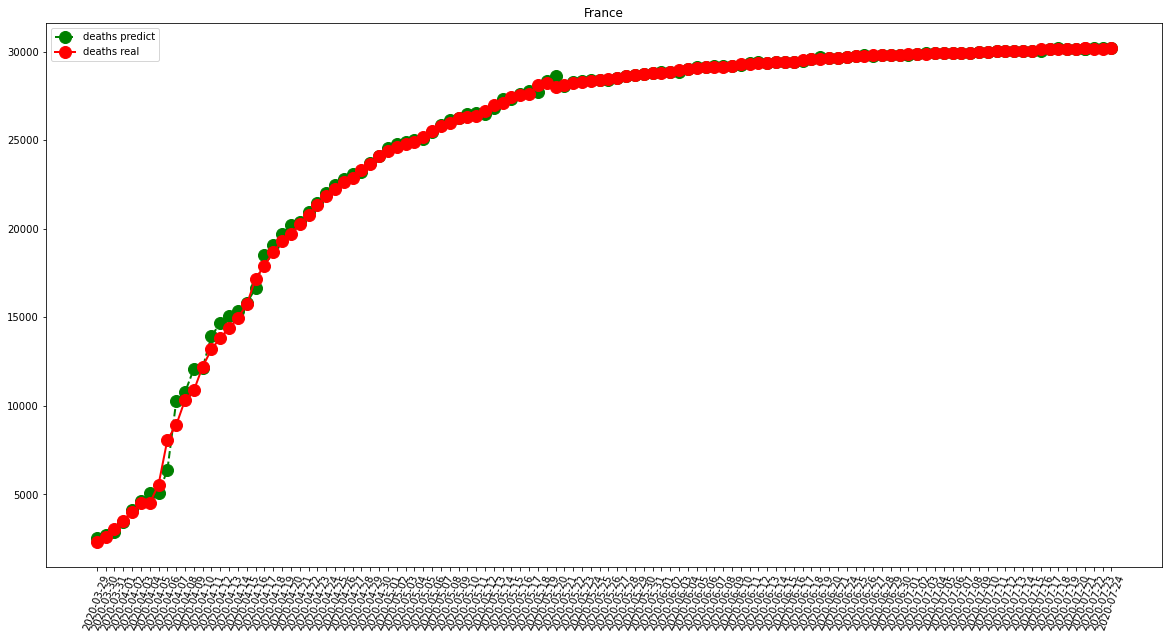

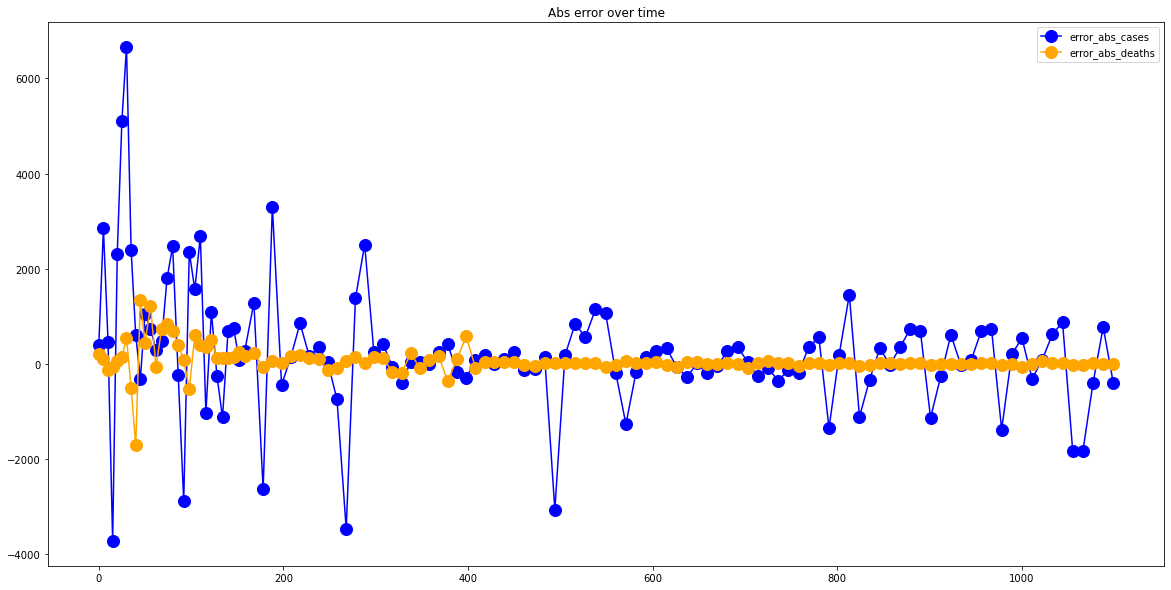

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  335.96581196581195
RMSE =  504.29253143880413
-- Italy performances for deaths --
MAE =  86.82905982905983
RMSE =  273.5707380513287


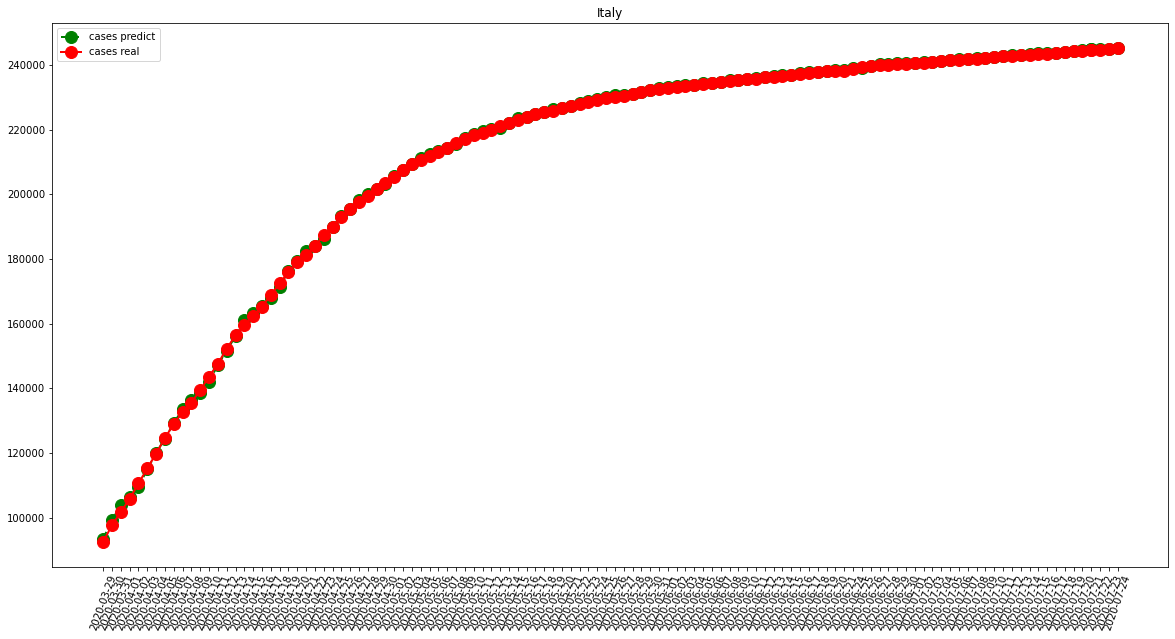

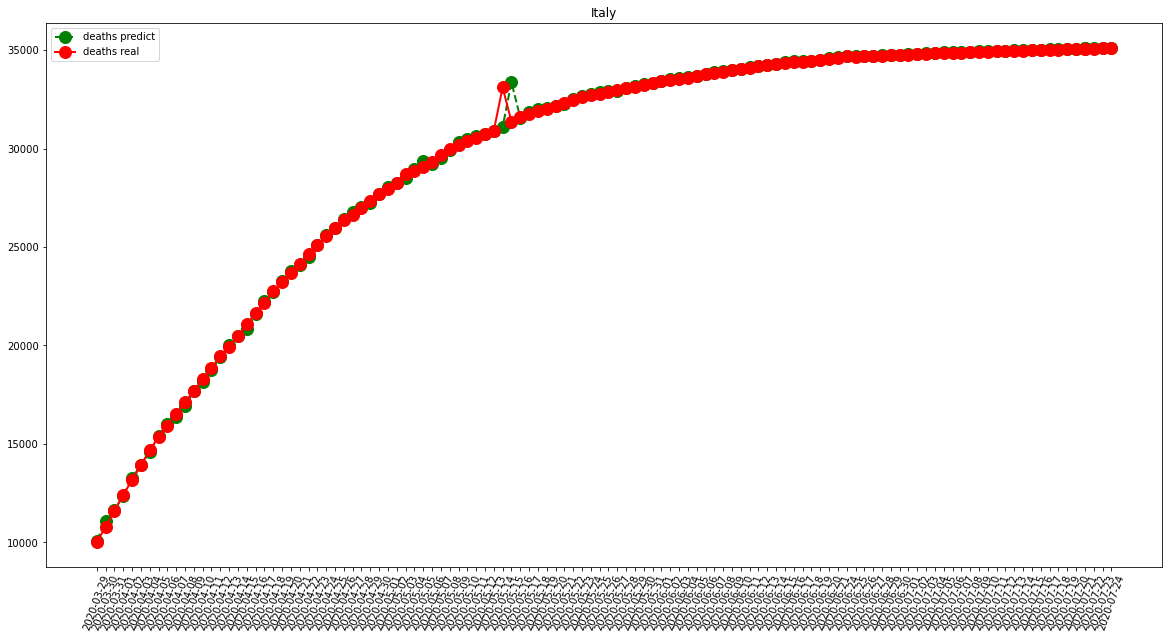

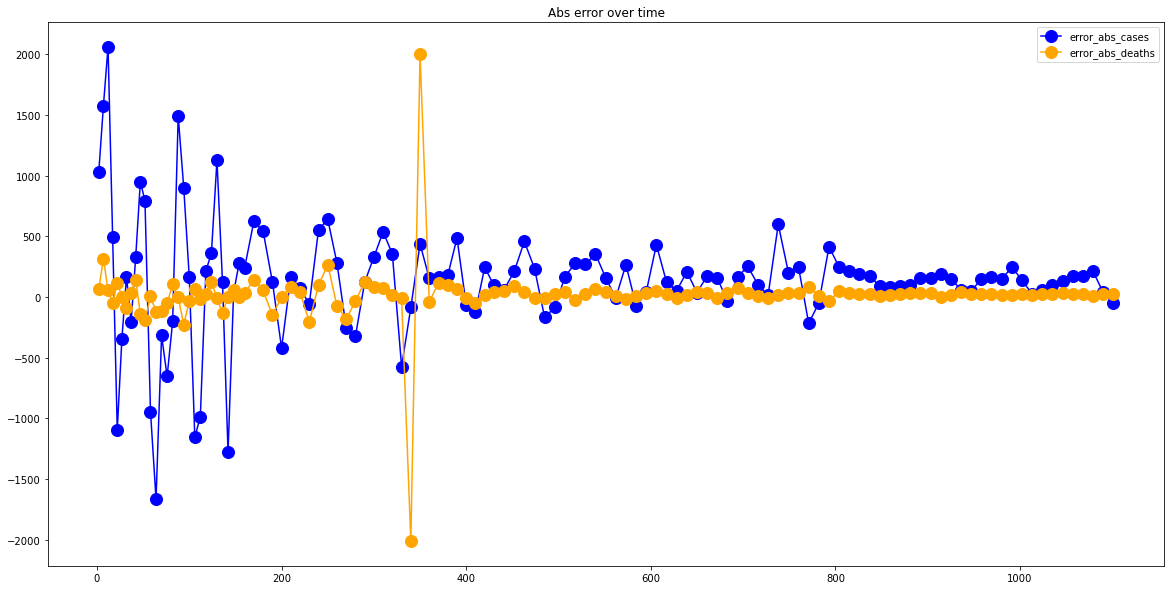

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  938.3504273504274
RMSE =  2028.5483820854602
-- Spain performances for deaths --
MAE =  156.7863247863248
RMSE =  375.2677676485118


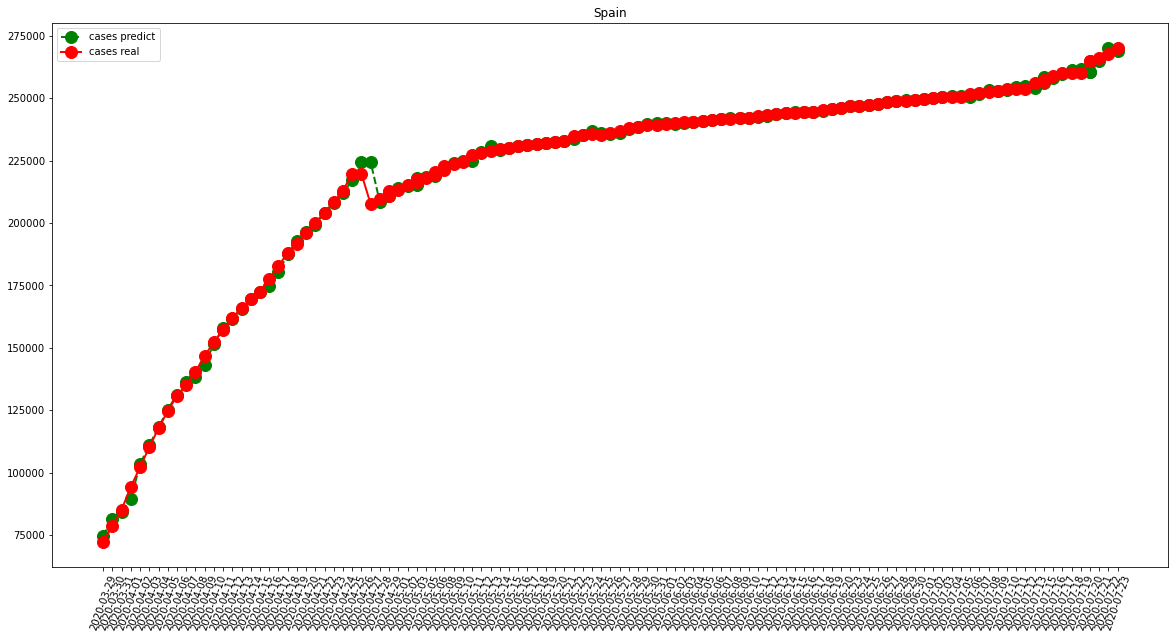

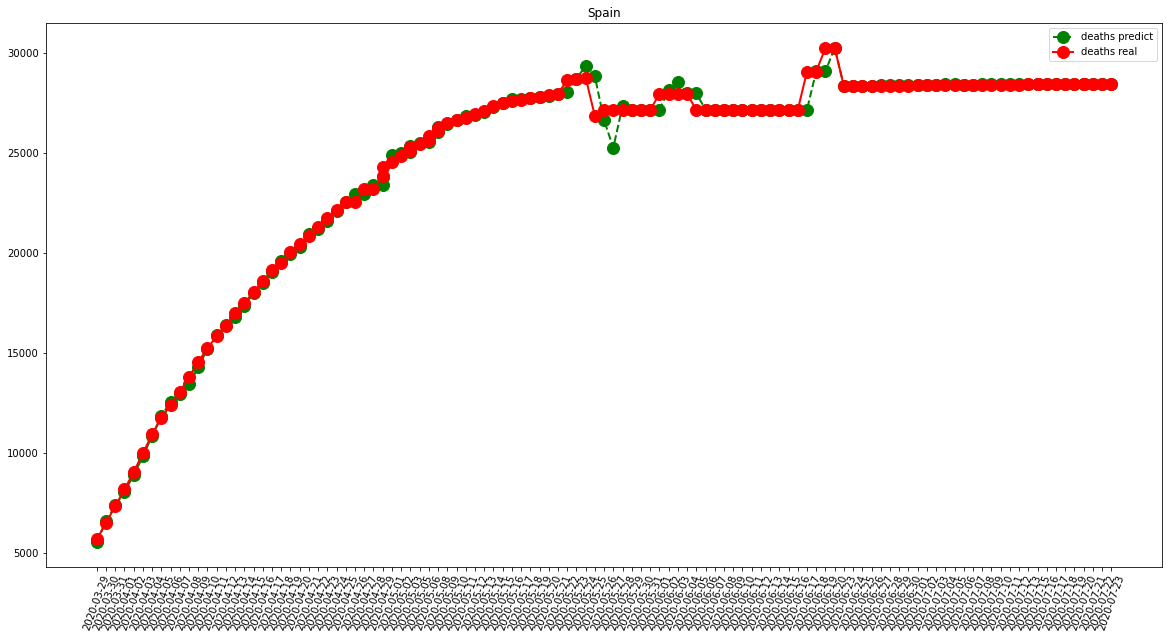

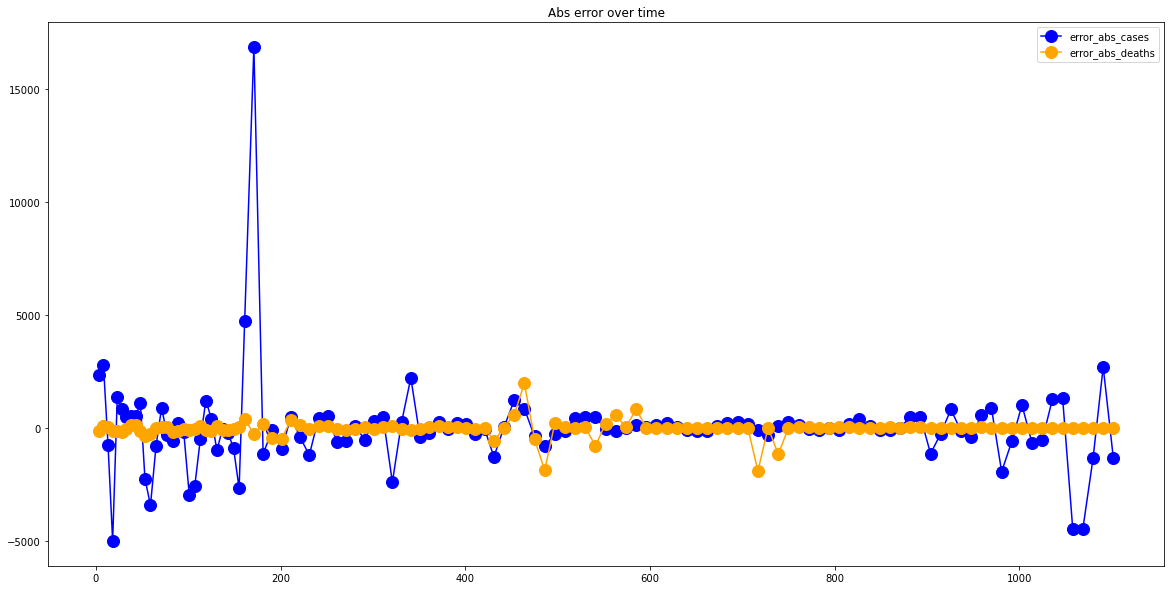

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5509.752136752137
RMSE =  7430.518278618853
-- United States performances for deaths --
MAE =  509.64102564102564
RMSE =  738.6219092244182


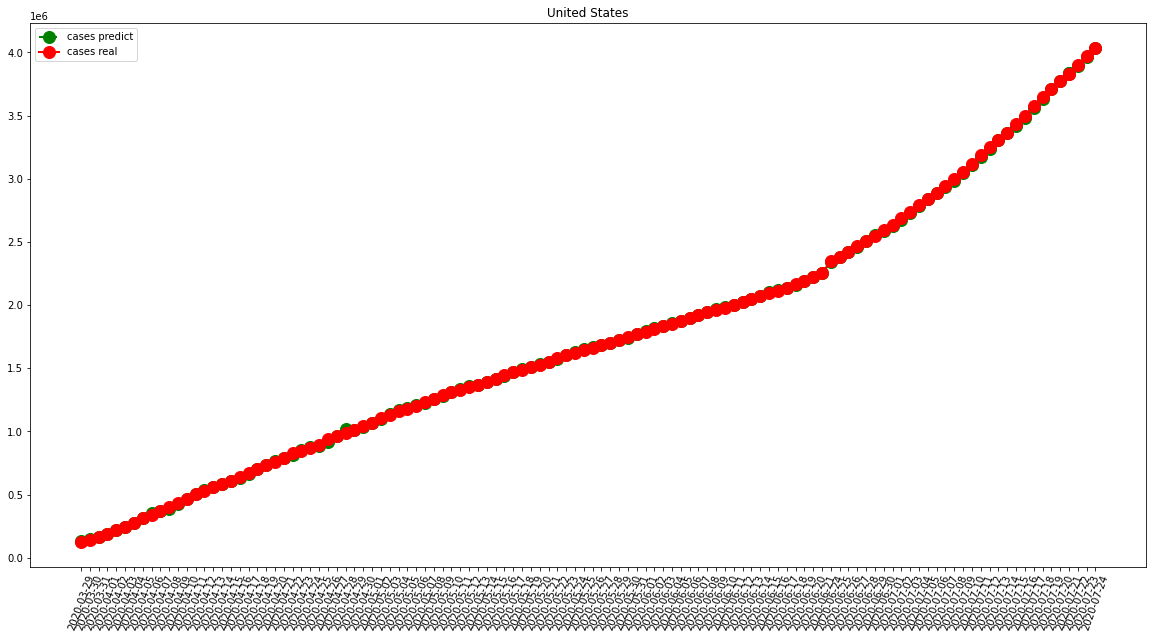

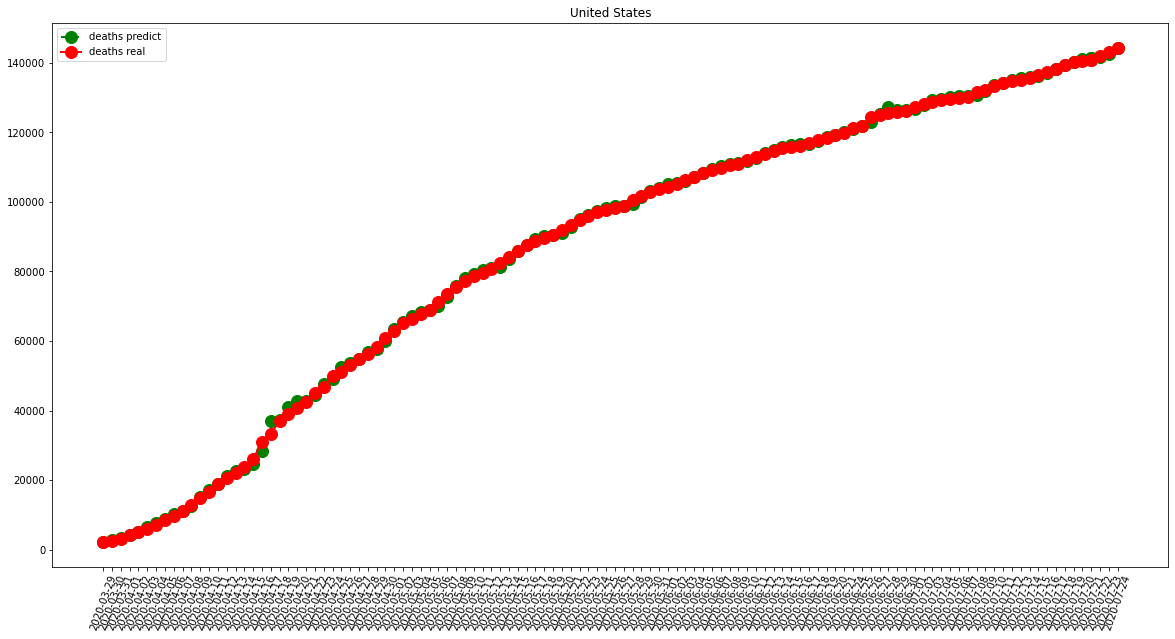

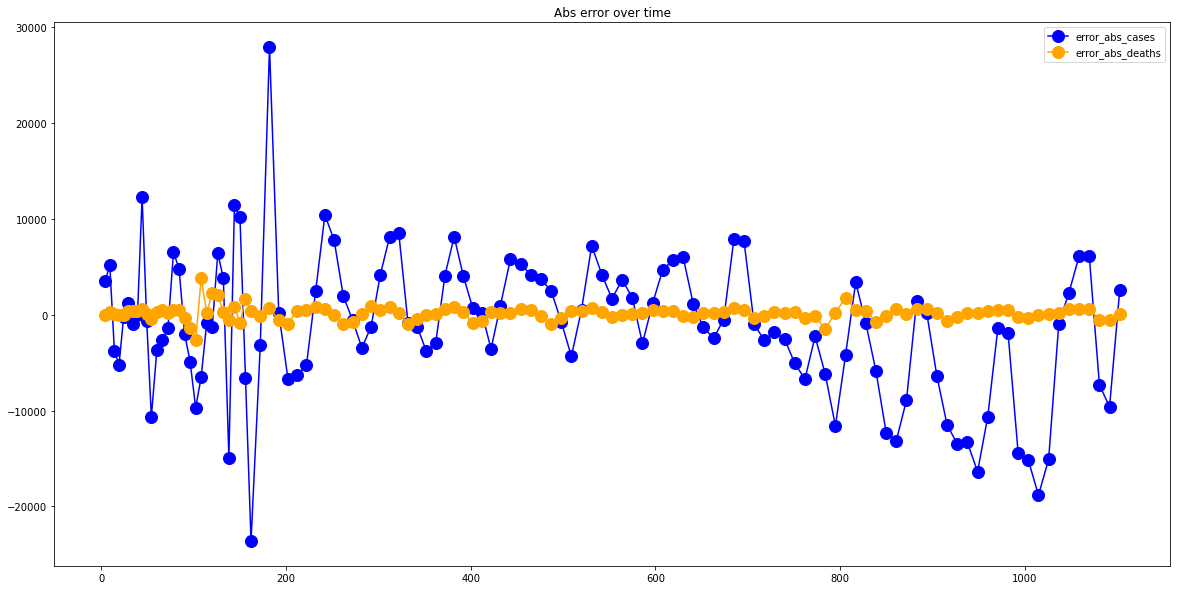

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  79.86324786324786
RMSE =  109.4989364971966
-- China performances for deaths --
MAE =  34.042735042735046
RMSE =  145.13580436750166


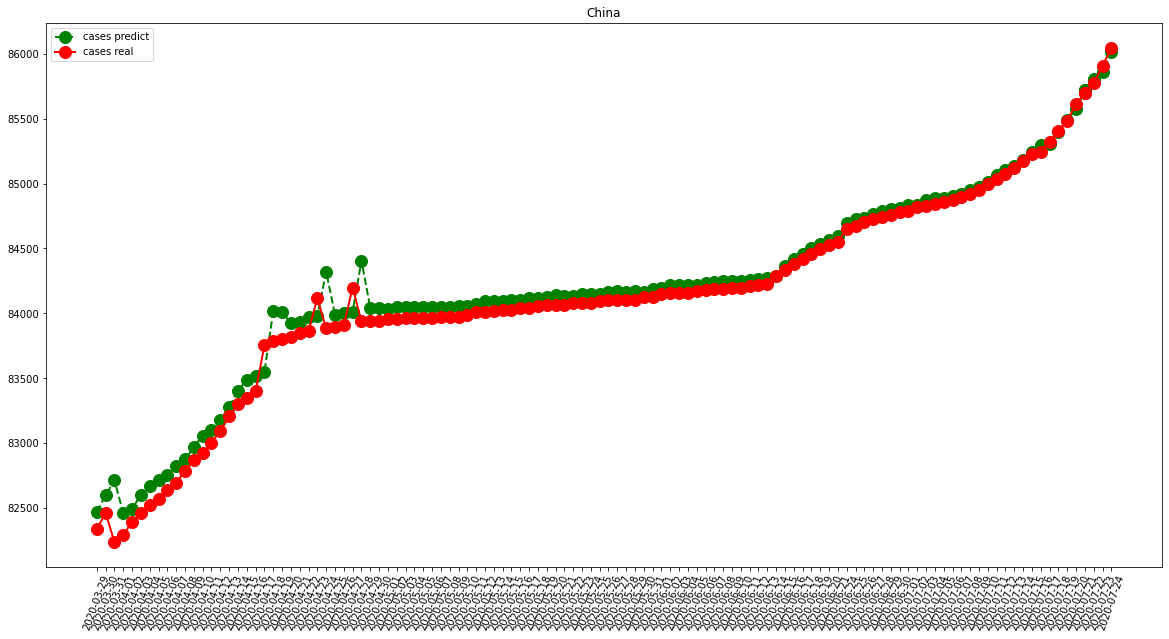

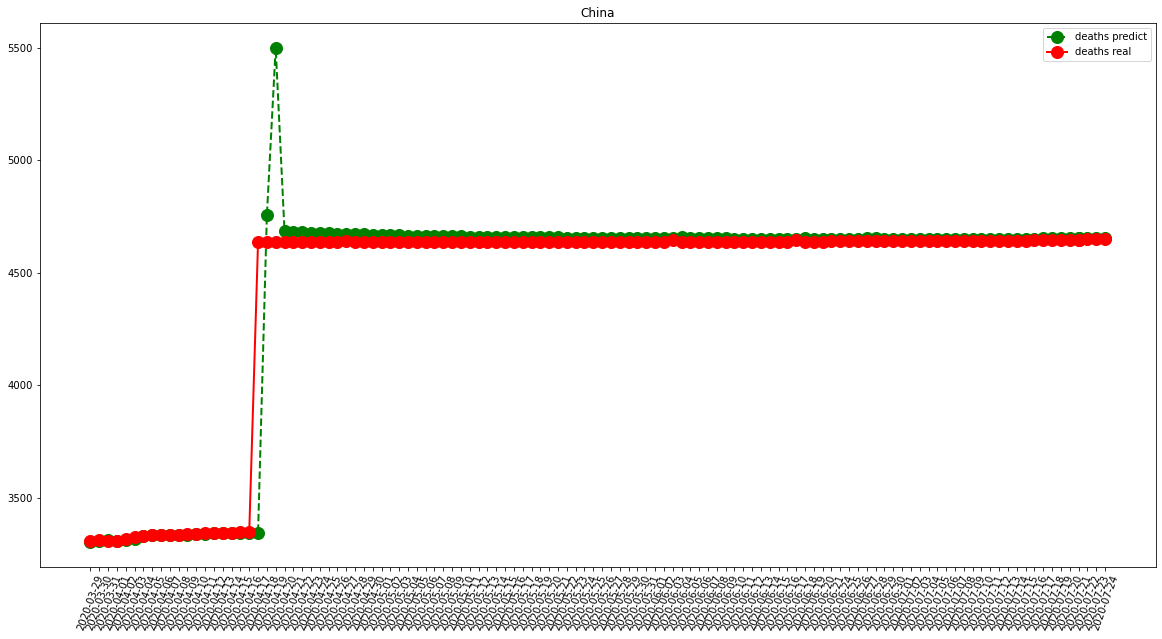

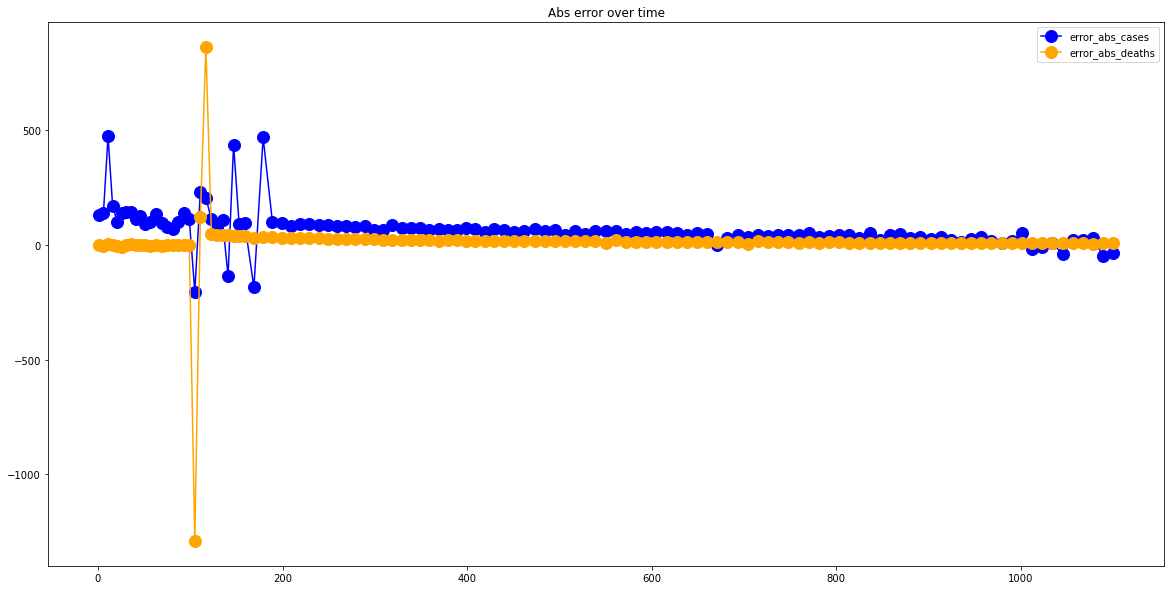

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1359.2022471910113
RMSE =  4423.419239010129
-- United Kingdom performances for deaths --
MAE =  211.13483146067415
RMSE =  519.8251110396801


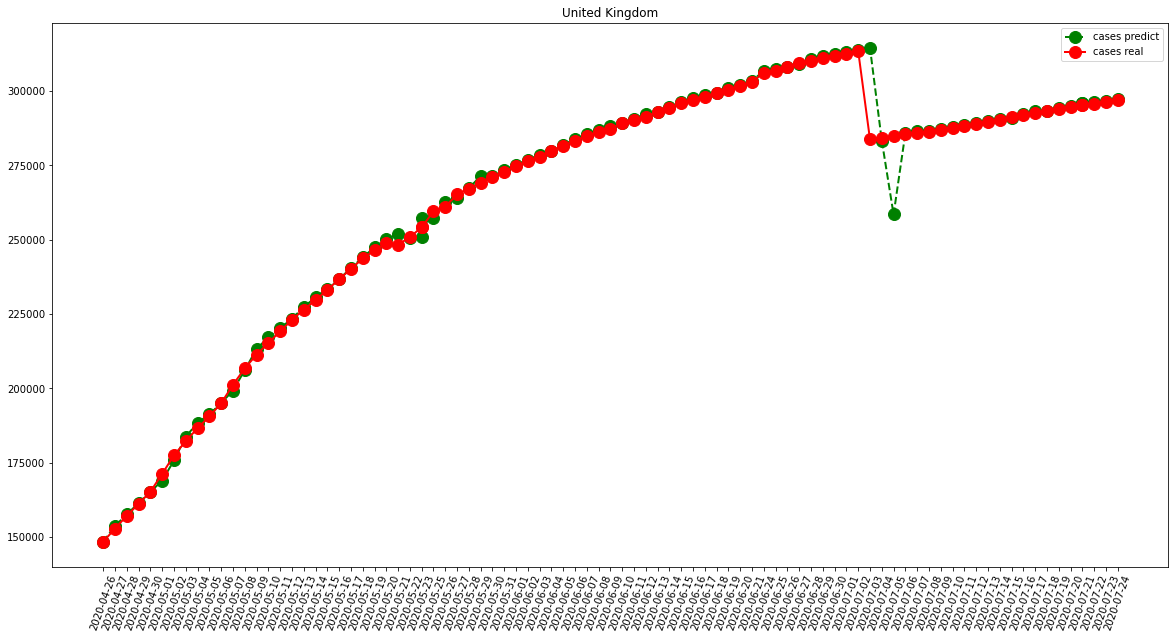

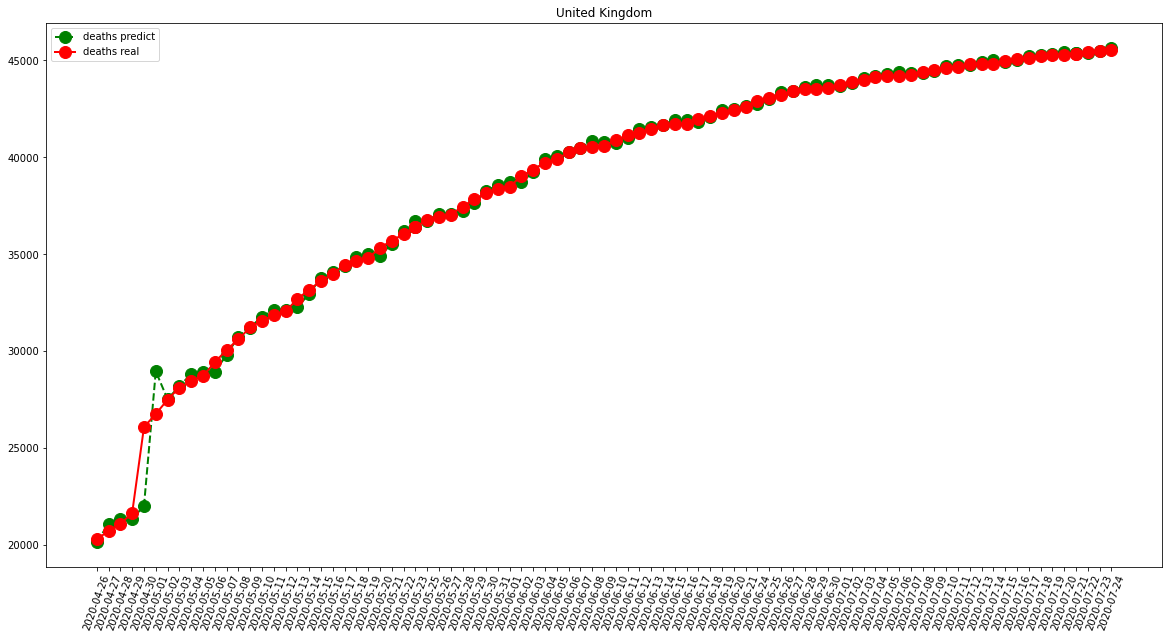

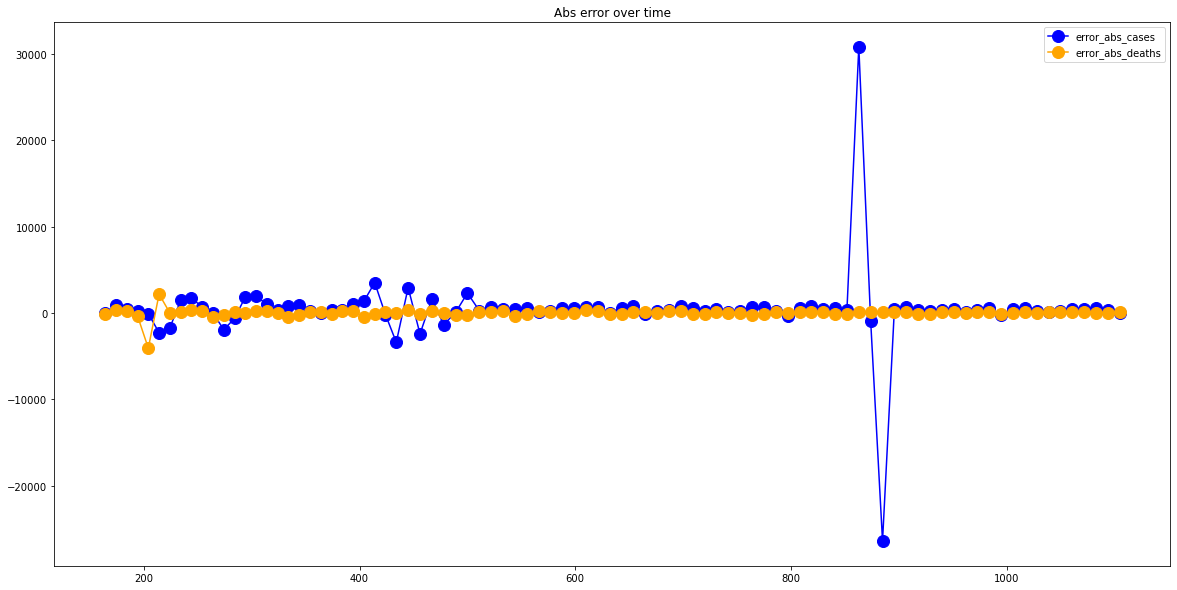

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  291.91011235955057
RMSE =  409.54167312066295
-- Germany performances for deaths --
MAE =  26.662921348314608
RMSE =  46.273612253759005


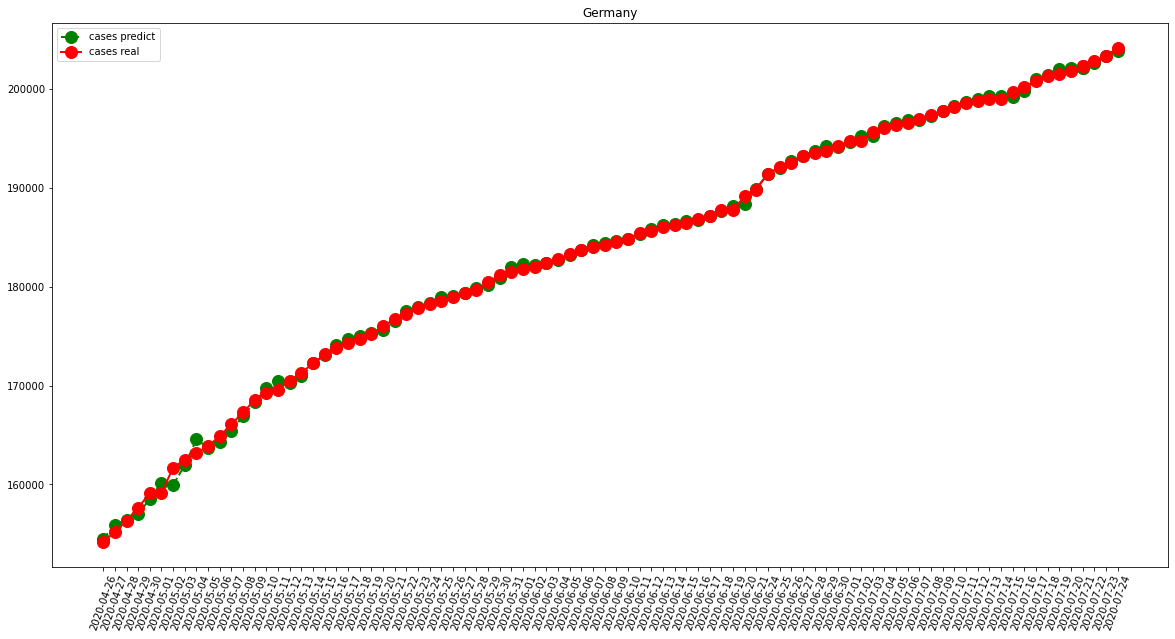

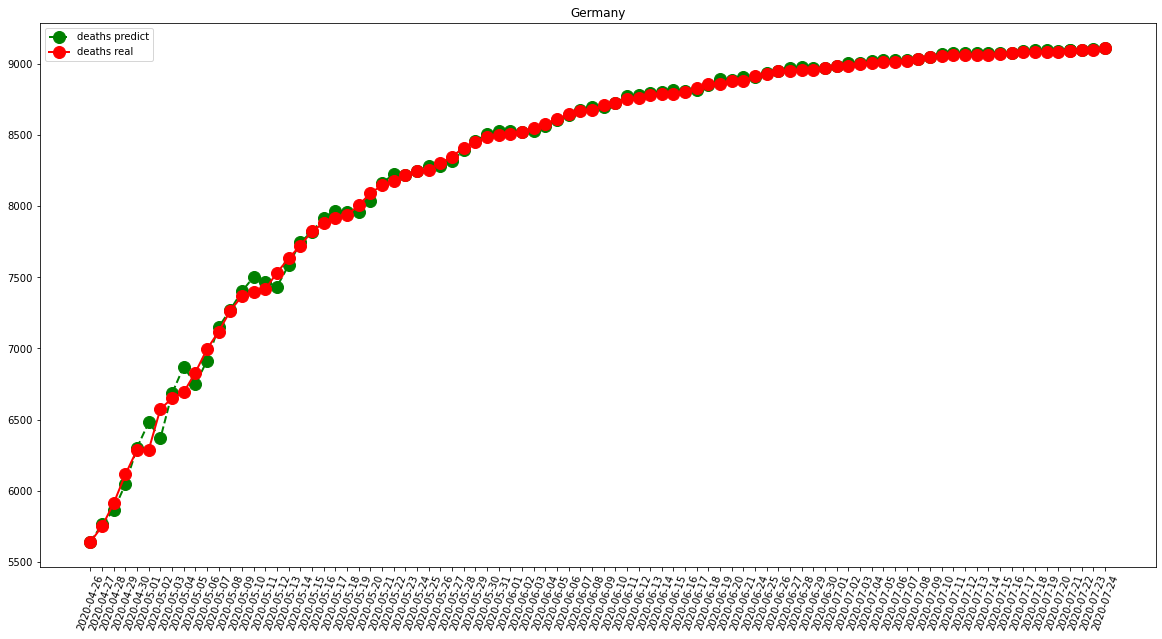

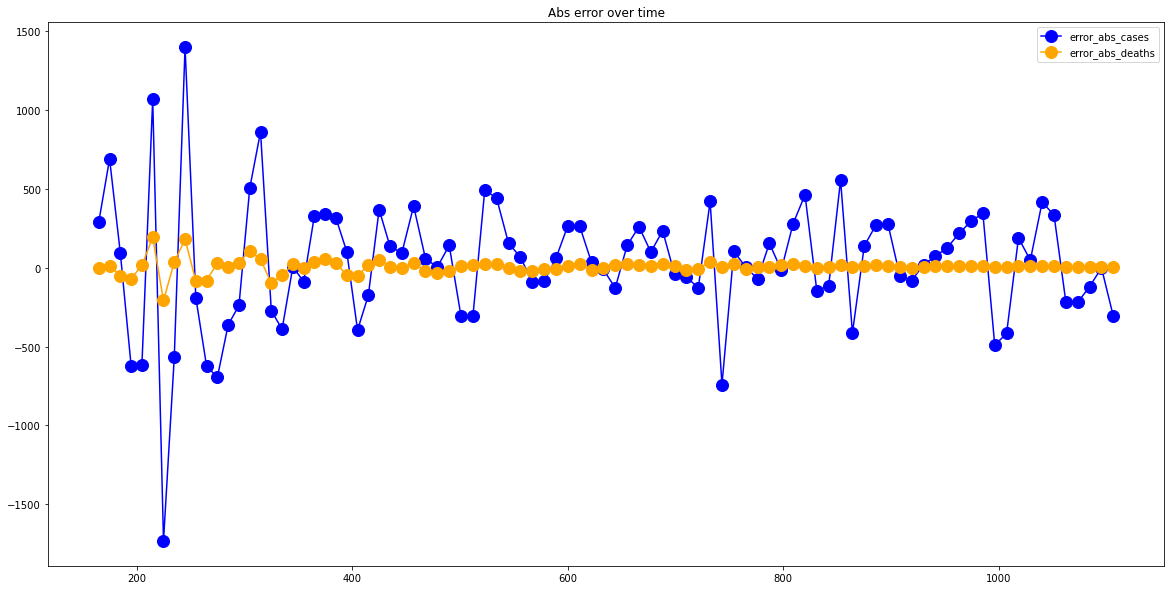

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  428.1011235955056
RMSE =  552.1836630622179
-- Iran performances for deaths --
MAE =  20.382022471910112
RMSE =  30.41288904765082


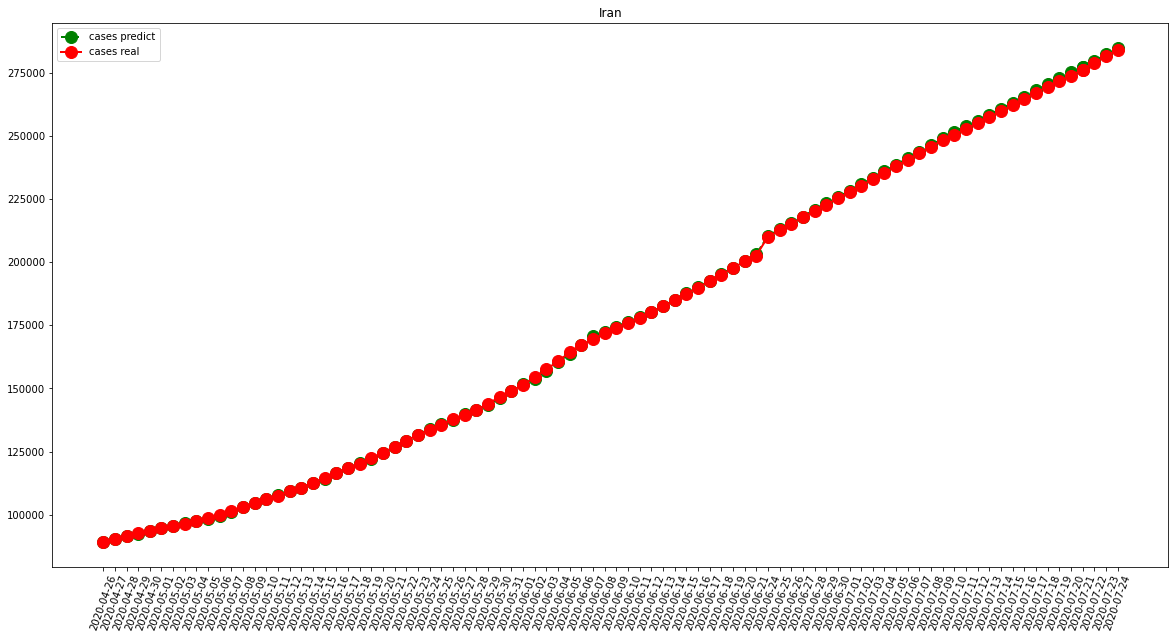

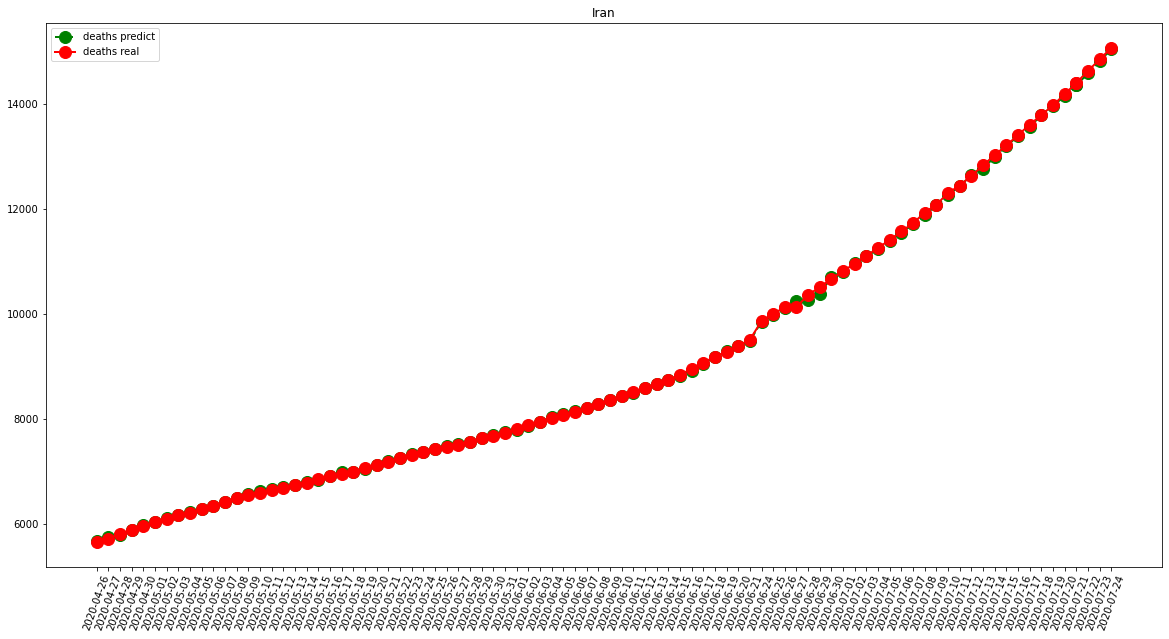

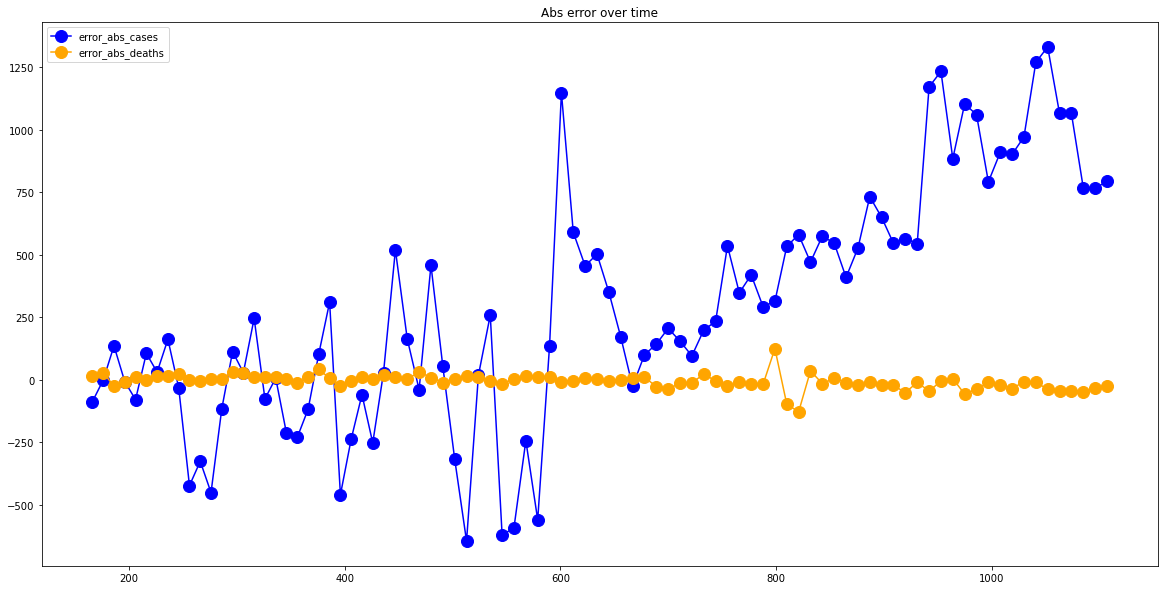

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  214.6629213483146
RMSE =  364.20445856750496
-- Turkey performances for deaths --
MAE =  21.06741573033708
RMSE =  107.59793030881947


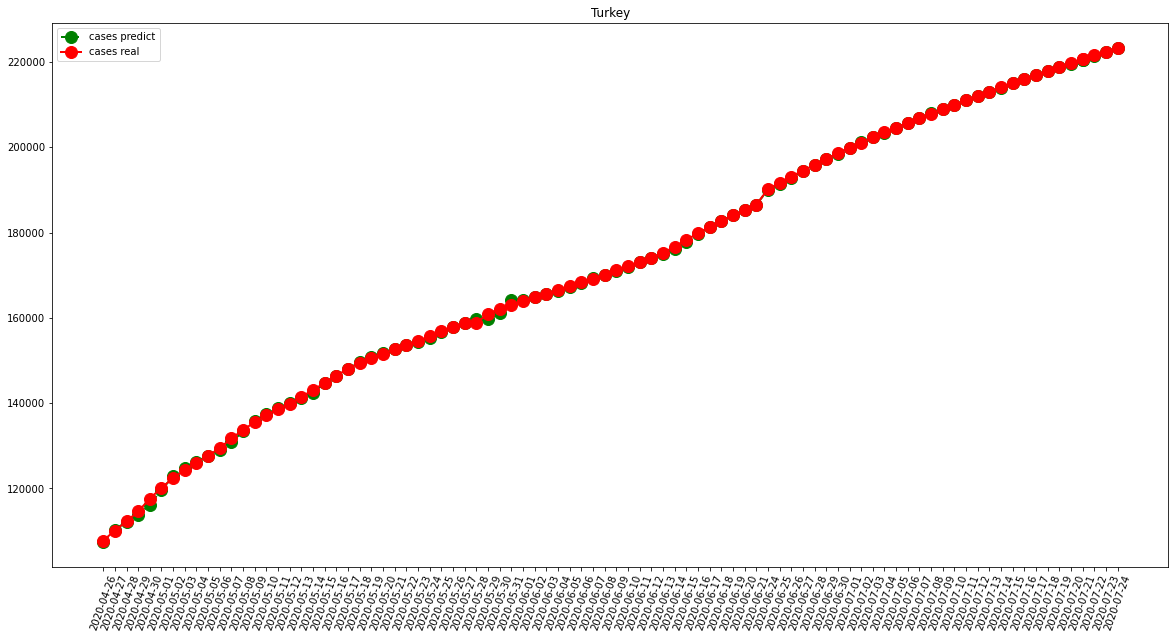

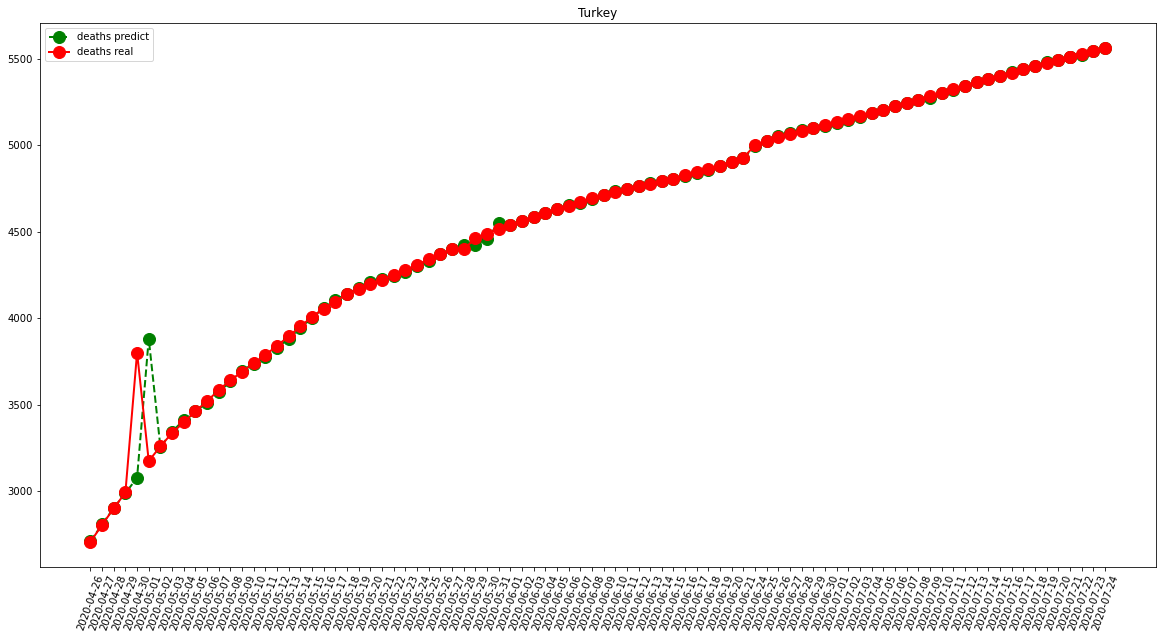

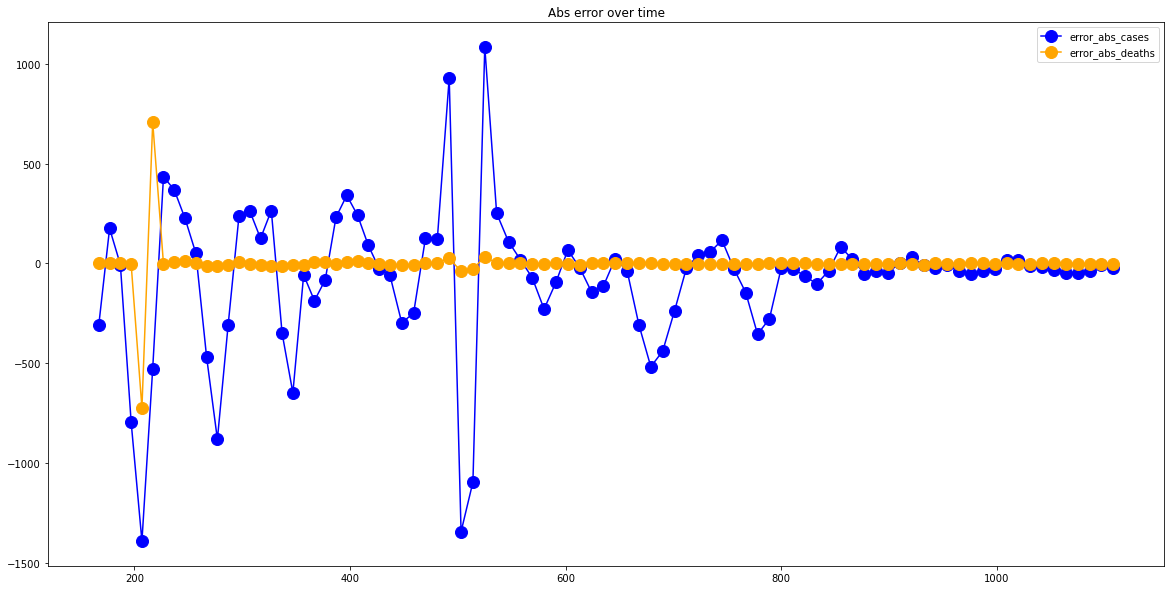

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10905.41935483871
RMSE =  14217.080009622228
-- Brazil performances for deaths --
MAE =  374.85483870967744
RMSE =  462.9114908782205


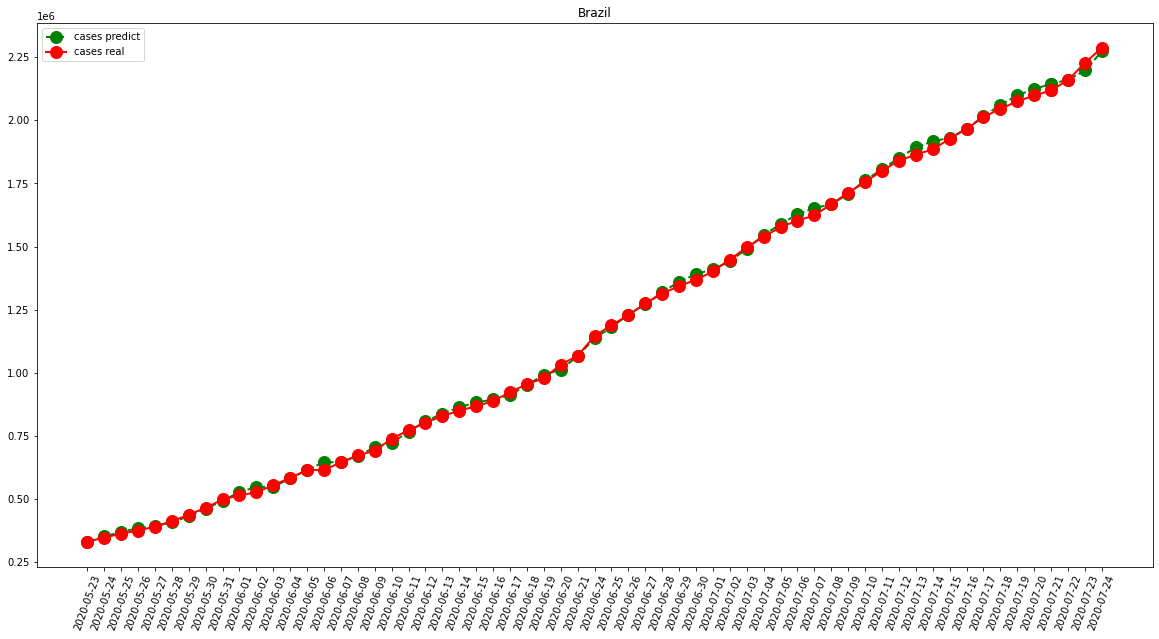

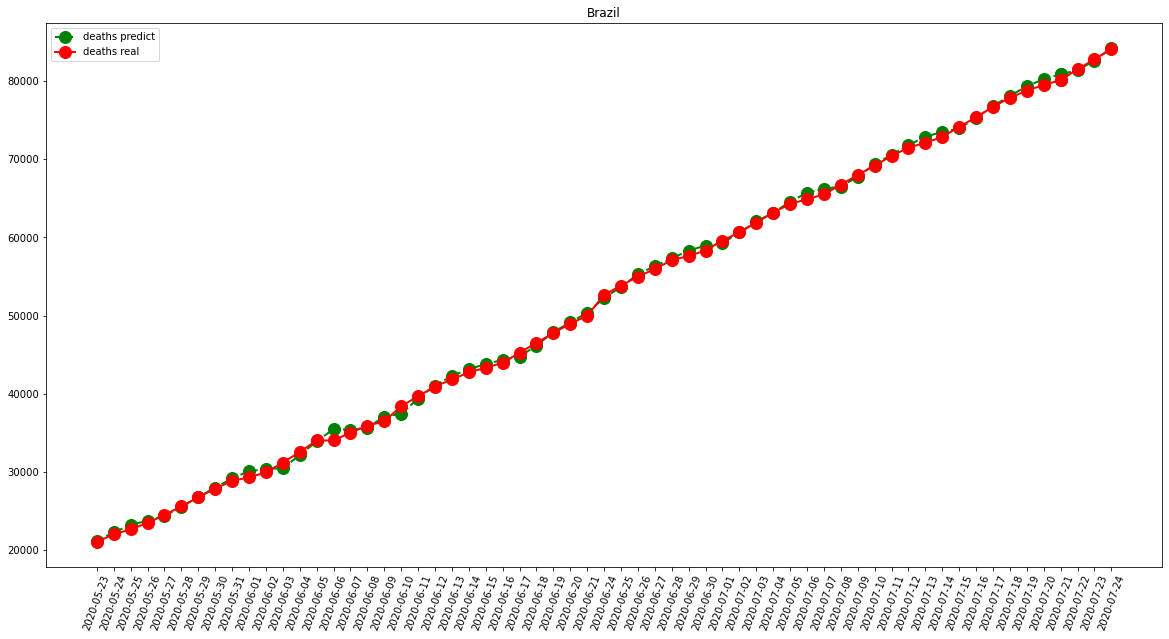

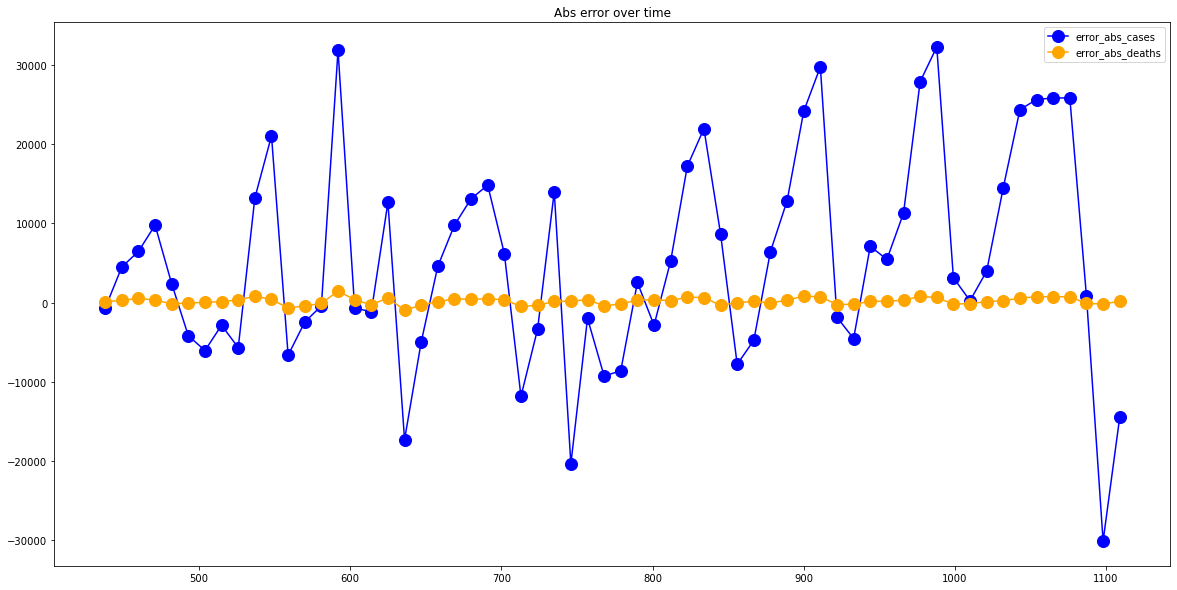

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)